### Résolution du " Rocket Challenge".

Le but du problème posé est d'étudier et de fournir divers données sur la trajectoire de vol d'une fusée, i.e sa vitesse à un instant donné, etc. 

Pour se faire nous allons, dans un premier temps, étudier les équations de mouvement (1) et (2) de la fusée ainsi que l'équation de variation de la masse de propergol fournies ci-dessus. Ensuite, nous allons utiliser la méthode d'Euler pour calculer et obtenir les divers renseignements recherchés.

Nous finirons par une discussion sur la cohérence des résultats obtenus.

##### 1. Etude des équations du mouvement de la fusée.

Commençons par rappeler les équations du mouvement de la fusée. Ces équations sont données par :

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

Il s'agit de deux EDO du premier ordre auxquelles nous pouvons appliquer la méthode d'Euler. 
C'est à dire une méthode numérique (qui offre donc une solution approximée par rapport à la solution exacte) qui consiste principalement à réexprimé nos EDO du premier odre en un système d'équations discrétisées. Une fois discrétisées, des solutions approximées sont alors obtenues à chaque itération. Notons finalement que la donnée de conditions initiales est essentielle car elles constituent les premières valeurs dont notre algorithme va se servir.

Comme annoncer, commençons par noter plus succinctement les dérivées par rapport au temps par des primes et faisons passer le terme $(m_s+m_p)$ du côté droit de l'égalité de l'équation (4). Nous obtenons alors:

\begin{align}
h' &= v\\
v' &= -g + \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)}
\end{align}


Avant de poursuivre, notons que nous pouvons représenter ceci sous forme vectorielle. Notre système peut donc s'écrire comme suit:
$$u'(t) = f(u)$$

où

\begin{align}
u & = \begin{pmatrix} h  \\ v \\\end{pmatrix} & f(u) & = \begin{pmatrix} v \\ \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)} - g  \end{pmatrix}.
\end{align}

Cette forme vectorielle présente l'avantage de représenter clairement ce qui devra être coder et comment ceci devra être fait. En effet, ces vecteurs correspondront tout simplement aux colonnes d'un tableau. Notons finalement que f(u) sera véritablement une fonction définie et appelée au cours de la méthode d'Euler.  



Poursuivons maintenant la réécriture de notre système en remplaçant chacune des dérivée temporelle par une forme approximée. Nous aurons ainsi, par exemple, pour h' :

\begin{align}
h'(t) \approx \frac{h^{n+1}-h^n}{\Delta t}
\end{align}
où n représente la $n^{e}$ valeur dans l'itération temporelle. Nos deux équations deviennent ainsi :

\begin{align}
\frac{h^{n+1}-h^n}{\Delta t} &= v^n\\
\frac{v^{n+1}-v^n}{\Delta t} &= \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v^n|v^n|AC_D}{2 (m_s+m_p)} - g
\end{align}


Enfin, dans le but d'évaluer l'état à $t^{n+1}$ (donc pour h par exemple, on veut évaluer l'état $h^{n+1}$), on va évaluer toutes les données de notre système et ce à chaque itération $t^{n}$. Pour cela, il suffit d'isoler l'état n+1 dans chacune de nos équations.


\begin{align}
h^{n+1} &= {h^n} + \Delta{t} v^n\\
v^{n+1} &= {v^n} + \Delta{t} (\frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v^n|v^n|AC_D}{2 (m_s+m_p)} - g)
\end{align}

Ce qui nous donne finalement un système de deux EDO discrétisées sur lequel on va pouvoir appliqué la méthode d'Euler.

##### 2. Variation de la quantité de propergol au cours du vol.


A présent, si l'on observe l'évolution de la masse de $propergol^1$ tout au long de la trajectoire, on a que celle-ci évolue selon:
\begin{align}
m_p = m_{po} - \int^t_0 \dot{m}_p d\tau
\end{align}

Or de part le graphique donné dans l'énoncé et repris ci-dessous, on peut déterminer graphiquement $\dot{m}_p$, la variation de la masse de propergol tout au long du vol.

---
###### [1] Le propergol est un mélange de comburants (des oxydants) et de combustible (des réducteurs) présents séparément avant la combustion. Le propergol, parfois assimilé aux ergols (il s'agit également d'un mélange comburants-combustible), est utilisé comme carburant dans les systèmes propulsifs à réaction comme les fusées.

#### Variation de la masse de Propergol en fonction du temps
![Image](./figures/burn.rate.png)

---
###### source : 01 Phugoid/Rocket assignment.ipynb

A partir du graphique on observe que :

$$
→ \dot{m}_p = \left\{ 
\begin{aligned} 
\mbox{20  kg.$s^{-1}$ si t} \in \mbox{ [ } 0,5 ] s\\
\mbox{0 kg.$s^{-1}$ si t} \in \mbox{]} 5,+ \infty]s
\end{aligned}
\right.
$$


Ce qui nous permettra de déterminer la masse de propergol à chaque instant.

##### 3. Résolution du problème.

Ramener aux trois équations reprises ci-dessous, notre problème peut désormais être résolu par la méthode d'Euler. 

\begin{equation}
\left\{
\begin{aligned}
m_p &= m_{po} - \int^t_0 \dot{m}_p d\tau\\
h^{n+1} &= {h^n} + \Delta{t} v^n\\
v^{n+1} &= {v^n} + \Delta{t} (\frac{v_e}{m_s+m_p}\dot{m}_p -                   \frac{\rho v^n|v^n|AC_D}{2 (m_s+m_p)} - g)\\
\end{aligned}
\right.
\end{equation}

Pour se faire commençons par importer la librairie numpy.

In [41]:
import numpy
from matplotlib import pyplot
%matplotlib inline

Ceci étant fait, définissons maintenant nos fonctions f(u) et euler_step comme vu tout au long du module a ceci près que nous n'avons plus quatre variables indépendantes mais deux. L'altitude h, et la vitesse de la fusée v.

In [42]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]
    return numpy.array([v,
                ((v_e*m_p_dot)/(m_s+m_p)) - ((rho*v*abs(v)*A*C_D)/(2*(m_s+m_p)))-g])

In [43]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

Posons maintenant l'ensemble de nos paramètre et données initiales.

In [44]:
# Paramètres du modèle:

m_s = 50.0     # poids de la structure de la fusée en kg
g  = 9.81      # gravité en m.s^{-2}
rho = 1.091    # densité moyenne de l'air en kg.m^3
r  = 0.5       # rayon de la section transversale maximale de la fusée
A  = numpy.pi*r**2   # supericie de section transversale maximale de la fusée
v_e = 325.0    # vitesse d'échappement en m/s
C_D = 0.15     # coefficient de traînée
m_p0 = 100     # poids initiale (t=0) de propergol de la fusée

# Conditions initiales:

v0 = 0       # vitesse initiale de la fusée
h0 = 0       # altitude initiale de la fusée

Nos paramètres et conditions initiales étant posées, nous pouvons désormais passer à l'écriture de notre algorithme. Ce dernier se déroulera en plusieurs étape.
Tout d'abord, nous allons discrétiser le temps grâce à notre intervalle de temps dt. Nous définirons ensuite une boucle "for" allant de 0 jusqu'a N-1 (soit N le nombre d'étape) à l'intérieur de laquelle un booléen s'effectuera à chaque passage de la boucle afin de définir la masse du propagol qui elle même dépend de la manière dont on a définit la vitesse de consommation (voir plus haut). 

la fonction " euler_step " (qui elle même appelera la fonction f(u) où seront calculer nos solution à chaque itération).

In [45]:
# Discrétisation du temps

T = 50.0
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)


u = numpy.empty((N, 2))      # Initialise le tableau de solution pour chaque dt
u[0] = numpy.array([h0,v0])  # remplit le 1er élément avec les CI


# time loop - Méthode d'Euler
for n in range(N-1): 
    if t[n] < 5 :
        m_p_dot = 20
        m_p_int= m_p_dot*t[n]
        m_p = m_p0 - m_p_int
        u[n+1] = euler_step(u[n], f, dt)

    else :
        m_p_dot = 0
        m_p = 0
        u[n+1] = euler_step(u[n], f, dt)

#En prenant u[n+1], on s'assure ainsi de conserver les valeurs ini pour n=0.
#On commence ainsi à u[1] (pour n=0) et on termine à u[N] (n=N-1).
#En prenant donc comme dernier step N-1 on termine bien avec N step

In [46]:
# Méthode pour déterminer l'indice à partir duquel la hauteur devient négative

g=u[:,0]
k=u[:,1]

idx_negative_h = numpy.where(g<0.0)[0]  # création d'un liste d'indice correspondant aux valeurs négatives de y
if len(idx_negative_h)==0:       # si la liste créer est de longueur nulle alors :
    idx_ground_h = N-1           # Alors l'indice "recherché" correspond au dernier élément de la liste          
else:
    idx_ground_h = idx_negative_h[0]    # dans le cas contraire l'indice recherché correspond au premier élément qui compose notre nouvelle liste
    

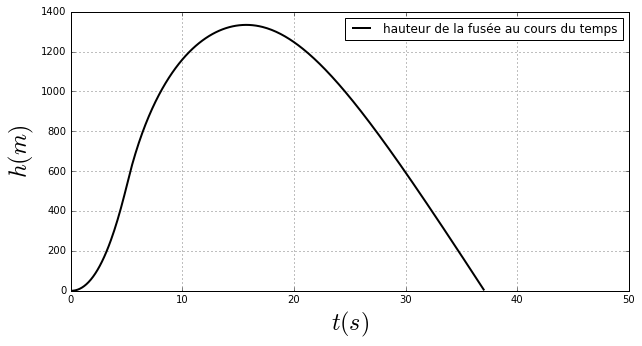

In [47]:
#Graphique de la hauteur de la fusée en fonction du temps
pyplot.figure(figsize=(10,5))
pyplot.grid(True) 
pyplot.xlim(0.0,50) 
pyplot.xlabel('$t(s)$', fontsize=24)
pyplot.ylabel('$h(m)$', fontsize=24)
pyplot.plot(t[:idx_ground_h],g[:idx_ground_h], color='k', ls='-', lw=2)
pyplot.legend(['hauteur de la fusée au cours du temps'])


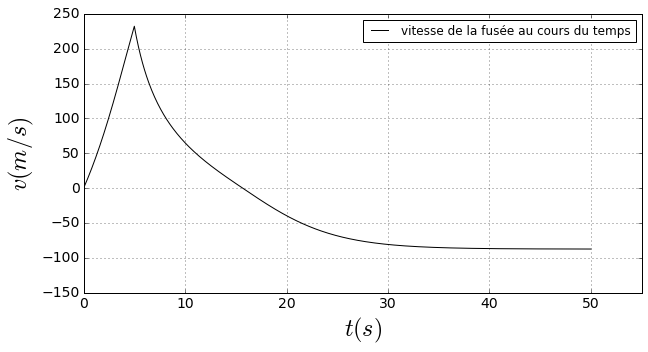

In [48]:
#Graphique de la vitesse de la fusée en fonction du temps
pyplot.figure(figsize=(10,5))   # initialise la taille du plot ("l'échelle d'affichage")
pyplot.xlim(0.0,55) 
pyplot.ylim(-150,250)             # limites du plot de l'axe y
pyplot.tick_params(axis='both', labelsize=14) # règle la taille de la police pour les graduations
pyplot.xlabel('$t(s)$', fontsize=24) # nom de l'axe x & taille de la police
pyplot.ylabel('$v(m/s)$', fontsize=24) # nom de l'axe y & taille de la police
pyplot.plot(t, k, 'k-');
pyplot.grid(True)
pyplot.legend(['vitesse de la fusée au cours du temps'])

##### 4. Analyse et interprétation physique des graphiques:

##### 5. Questions - Réponses :  

1) Au temps $t=3.2s$, quelle est la masse (en kg) de propergol restant dans la fusée ?

Pour obtenir la masse recherchée on lance une boucle for qui aura pour rôle de parcourir l'ensemble de nos valeurs de temps (0.0, 0.1, 0.2, ... 100.0) via leur indice correspondant à leur emplacement dans le tableau dans lequel ils sont rangés.

Cette boucle est alors couplée à un $booléen^{2}$ muni de la condition suivante : " Si le temps de l'étape n (où n est l'étape où l'on est en occupé à vérifier la condition) est égale à 3.2 s alors tu exécute ce qui suit".

Ainsi, si la condition est respecté notre algorithme calcul alors la masse de propergole recherchée selon l'équation 3. 


Remarque : Nous utiliserons ici les notations suivantes pour les variables de l'équation : $m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$


$\dot{m}_p :$ m_p_dot

$\int^t_0 \dot{m}_p d\tau :$ m_p_int



---
###### 2 Un booléen est une "variable" a deux état, c'est à dire une variable qui pour une certaine condition donnée est vraie ou fausse.

In [49]:
for n in range(N-1):            # On lance notre boucle for
    if t[n] == 3.2 :            # Notre booléen est alors vérifié pour chaque n
        m_p_dot = 20
        m_p_int= m_p_dot*t[n]
        m_p = m_p0 - m_p_int

print("→ Masse de propergol restante dans la fusée : m =", round(m_p), "kg")

→ Masse de propergol restante dans la fusée : m = 36.0 kg


2) Quelle est la vitesse maximale de la fusée en $\frac{m}{s}$ ?
A quelle moment cela se produit-il ? (en s)
Quelle est l'altitude a ce moment (en m) ?

In [50]:
vm=0
h_vmax=0
for n in range (N-1):
    if k[n] > vm:
        vm = k[n]
        h_vmax = g[n]
        
        t_max = t[n]

print("→ Vitesse maximale atteinte par la fusée : v =",round(vm,2),"m/s")
print("")
print("→ Temps correspondant à la vitesse maximale : t =",round(t_max,2),"s")
print("")
print("→ Altitude correspondant à la vitesse maximale : h =",round(h_vmax,2),"m")


→ Vitesse maximale atteinte par la fusée : v = 232.11 m/s

→ Temps correspondant à la vitesse maximale : t = 5.0 s

→ Altitude correspondant à la vitesse maximale : h = 523.52 m


3) Quelle est l'altitude maximale de la fusée durant le vol (en m)? A quel moment (en s) cela se produit-il ?

In [51]:
hm=0
t_max_h=0
for n in range (N-1):
    if g[n] > hm :
        hm = g[n]
        t_max_h = t[n]

print("→ Altitude maximale atteinte par la fusée : h =",round(hm,2),"m")
print("")
print("→ Temps correspondant : t =",round(t_max_h,2),"s")


        

→ Altitude maximale atteinte par la fusée : h = 1334.18 m

→ Temps correspondant : t = 15.7 s



4) A quel moment (en s) est-ce que la fusée impact le sol? Quelle est la vitesse de la fusée (en $\frac{m}{s}$) au moment de l'impact.

Pour se faire, ressortons tout d'abord l'indice correspondant au moment qui précède l'impact de la fusée au sol (soit le dernier indice pour lequel l'altitude h, est supérieur ou égale à 0). Cet indice est facilement récupérable grâce a et ainsi resortir les valeurs de temps et de vitesse correspondante. 

In [55]:
print("→ Indice de l'altitude recherché :",idx_ground_h)
print("")
print("→ Temps correspondant à cet indice : t =",round(t[372],2),"s")
print("")
print("→ Vitesse correspondante à cette indice : v =",round(k[372],2),"m/s")


→ Indice de l'altitude recherché : 371

→ Temps correspondant à cet indice : t = 37.2 s

→ Vitesse correspondante à cette indice : v = -86.04 m/s


---

###### The cell below loads the style of the notebook.

In [53]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())